In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import re

## Data Preparation

In [4]:
TESS = '../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data'
SAVEE = '../input/savee-database/AudioData'
RAVDESS= '../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

### RAVDESS dataset

In [ ]:
ravdess_dir_list = os.listdir(RAVDESS)
print(ravdess_dir_list)
print(os.listdir(RAVDESS + ravdess_dir_list[0]))

In [ ]:
emotions = []
audios = []
for actor in ravdess_dir_list:
    audio = os.listdir(RAVDESS + actor)
    for file in audio:
        filename = file.split('.')[0]
        identifier = filename.split('-')
        emotions.append(int(identifier[2]))
        audios.append(RAVDESS + dir + '/' + file)
        
emotion_df = pd.DataFrame(emotions, columns=['Emotion'])
audio_df = pd.DataFrame(audios, columns=['Audio'])
Ravdess_df = pd.concat([emotion_df, audio_df], axis=1)
    
Ravdess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

In [ ]:
plt.title('Count of Emotions in RAVDESS', size=16)
plt.style.use('seaborn-pastel')
sns.countplot(Ravdess_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### TESS dataset

In [5]:
tess_dir_list = os.listdir(TESS)
print(tess_dir_list)
print(os.listdir(TESS +'/'+ tess_dir_list[0]))

['YAF_fear', 'OAF_angry', 'OAF_Fear', 'OAF_disgust', 'OAF_neutral', 'YAF_angry', 'OAF_Sad', 'YAF_disgust', 'YAF_neutral', 'OAF_Pleasant_surprise', 'YAF_happy', 'OAF_happy', 'YAF_sad', 'YAF_pleasant_surprised']
['YAF_home_fear.wav', 'YAF_youth_fear.wav', 'YAF_near_fear.wav', 'YAF_search_fear.wav', 'YAF_pick_fear.wav', 'YAF_dodge_fear.wav', 'YAF_void_fear.wav', 'YAF_sheep_fear.wav', 'YAF_pain_fear.wav', 'YAF_fall_fear.wav', 'YAF_rag_fear.wav', 'YAF_when_fear.wav', 'YAF_date_fear.wav', 'YAF_such_fear.wav', 'YAF_burn_fear.wav', 'YAF_rose_fear.wav', 'YAF_choice_fear.wav', 'YAF_ring_fear.wav', 'YAF_shall_fear.wav', 'YAF_boat_fear.wav', 'YAF_wire_fear.wav', 'YAF_death_fear.wav', 'YAF_love_fear.wav', 'YAF_came_fear.wav', 'YAF_ripe_fear.wav', 'YAF_pike_fear.wav', 'YAF_chat_fear.wav', 'YAF_keg_fear.wav', 'YAF_doll_fear.wav', 'YAF_vote_fear.wav', 'YAF_cheek_fear.wav', 'YAF_limb_fear.wav', 'YAF_turn_fear.wav', 'YAF_bite_fear.wav', 'YAF_mop_fear.wav', 'YAF_yes_fear.wav', 'YAF_thin_fear.wav', 'YAF_s

In [6]:
emotions = []
audios = []
for dir in tess_dir_list:
    directories = os.listdir(TESS +'/'+ dir)
    for file in directories:
        filename = file.split('.')[0]
        emotion = filename.split('_')[2]
        if emotion=='ps':
            emotions.append('surprise')
        else:
            emotions.append(emotion)
        audios.append(TESS + '/'+dir + '/' + file)
        
emotion_df = pd.DataFrame(emotions, columns=['Emotion'])
audio_df = pd.DataFrame(audios, columns=['Audio'])
tess_df = pd.concat([emotion_df, audio_df], axis=1)
    
# tess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
tess_df.head()
tess_df['Audio'][0]

'../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav'

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


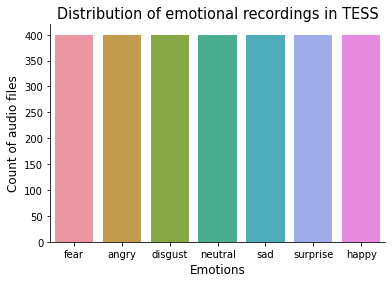

In [7]:
plt.title('Distribution of emotional recordings in TESS', size=14.5)
plt.style.use('seaborn-pastel')
sns.countplot(tess_df.Emotion)
plt.ylabel('Count of audio files', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

IndexError: tuple index out of range

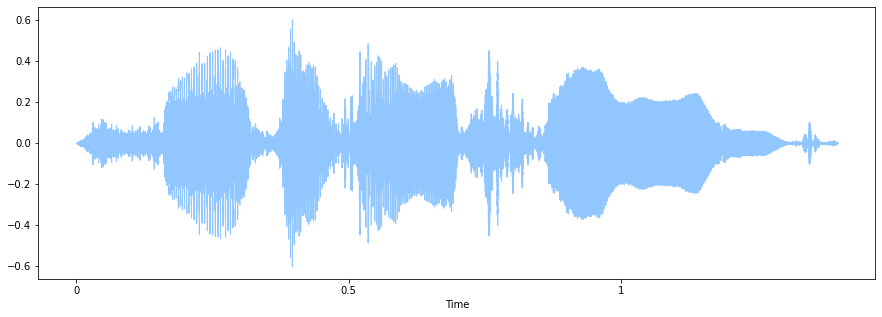

In [8]:
import librosa
import librosa.display
# lets play a fearful track 
# fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 
fname = tess_df['Audio'][0]
data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

librosa.display.specshow(data)
# Lets play the audio 
ipd.Audio(fname)

### SAVEE dataset

In [35]:
savee_dir_list = os.listdir(SAVEE)
print(savee_dir_list)
print(os.listdir(SAVEE + '/'+savee_dir_list[0]))

['DC', 'Info.txt', 'JE', 'KL', 'JK']
['n26.wav', 'su06.wav', 'su01.wav', 'h10.wav', 'su10.wav', 'sa02.wav', 'f08.wav', 'h13.wav', 'n07.wav', 'su04.wav', 'f01.wav', 'su13.wav', 'su12.wav', 'd13.wav', 'a13.wav', 'f07.wav', 'h02.wav', 'f06.wav', 'n14.wav', 'd15.wav', 'f12.wav', 'su08.wav', 'a08.wav', 'd09.wav', 'f10.wav', 'su14.wav', 'sa04.wav', 'n19.wav', 'su05.wav', 'n17.wav', 'sa14.wav', 'n01.wav', 'n18.wav', 'd12.wav', 'n02.wav', 'a05.wav', 'f05.wav', 'n09.wav', 'd02.wav', 'f15.wav', 'h09.wav', 'h06.wav', 'sa06.wav', 'n28.wav', 'a01.wav', 'f03.wav', 'd11.wav', 'a02.wav', 'sa11.wav', 'n25.wav', 'n11.wav', 'sa10.wav', 'h03.wav', 'a12.wav', 'n22.wav', 'sa08.wav', 'f09.wav', 'd04.wav', 'h01.wav', 'n08.wav', 'd07.wav', 'a03.wav', 'h14.wav', 'd10.wav', 'n29.wav', 'su11.wav', 'sa15.wav', 'h11.wav', 'h05.wav', 'su09.wav', 'a14.wav', 'a10.wav', 'd08.wav', 'n24.wav', 'f04.wav', 'n21.wav', 'su15.wav', 'n16.wav', 'f13.wav', 'f11.wav', 'd14.wav', 'sa01.wav', 'h15.wav', 'n03.wav', 'f14.wav', 'n04.w

In [36]:
emotions = []
audios = []
for actor in savee_dir_list:
    if actor !='Info.txt':
        dir = os.listdir(SAVEE +'/'+ actor)

    for file in dir:
        filename = file.split('.')[0]
        emotion = re.split('\d+',filename)[0]
        if emotion=='a':
            emotions.append('angry')
        elif emotion=='d':
            emotions.append('disgust')
        elif emotion=='f':
            emotions.append('fear')
        elif emotion=='h':
            emotions.append('happy')
        elif emotion=='n':
            emotions.append('neutral')
        elif emotion=='sa':
            emotions.append('sad')
        else:
            emotions.append('surprise')
        audios.append( SAVEE + '/' + file)
        
emotion_df = pd.DataFrame(emotions, columns=['Emotion'])
audio_df = pd.DataFrame(audios, columns=['Audio'])
savee_df = pd.concat([emotion_df, audio_df], axis=1)
    
# tess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
savee_df.head()

,Emotion,Audio
0,neutral,../input/savee-database/AudioData/n26.wav
1,surprise,../input/savee-database/AudioData/su06.wav
2,surprise,../input/savee-database/AudioData/su01.wav
3,happy,../input/savee-database/AudioData/h10.wav
4,surprise,../input/savee-database/AudioData/su10.wav


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


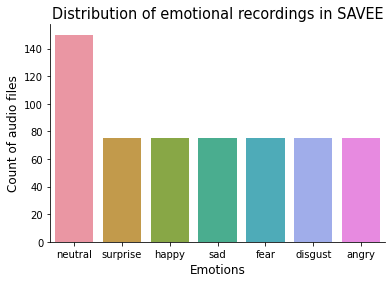

In [38]:
plt.title('Distribution of emotional recordings in SAVEE', size=14.5)
plt.style.use('seaborn-pastel')
sns.countplot(savee_df.Emotion)
plt.ylabel('Count of audio files', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
data_path = pd.concat([savee_df, tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

In [ ]:
plt.title('Count of Emotions', size=16)
plt.style.use('seaborn-pastel')
sns.countplot(data_path.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()